> ## 1. 한글 폰트 설치

- 나눔폰트 설치

In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

- 설치 확인

In [2]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/t

In [3]:
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic


- 적용하려면 '런타임 다시 시작' 진행

Text(0.5, 1.0, '안녕')

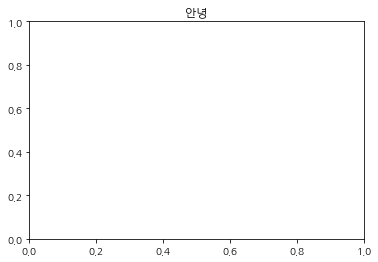

In [4]:
plt.title('안녕')
# '안녕' 출력 확인

> ## 2. 데이터 불러오기 & 확인

In [5]:
import pandas as pd
df = pd.read_excel('dataset_emotion3_ver2.xlsx')

df.head()

,Unnamed: 0,sentence,emotion
0,0,언니 동생으로 부르는게 맞는 일인가요..??,0
1,1,그냥 내 느낌일뿐겠지?,0
2,2,아직너무초기라서 그런거죠?,0
3,3,유치원버스 사고 낫다던데,0
4,4,근데 원래이런거맞나요,0


In [ ]:
df = df.loc[:,['sentence', 'emotion']]
df.head()

,sentence,emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,0
1,그냥 내 느낌일뿐겠지?,0
2,아직너무초기라서 그런거죠?,0
3,유치원버스 사고 낫다던데,0
4,근데 원래이런거맞나요,0


- 결측값 확인 및 감정별 데이터 개수 확인

In [9]:
df['emotion'].value_counts(dropna = False) # 없음

0    21149
2    19856
1    19852
Name: emotion, dtype: int64

- 감정별 데이터 비율 확인

In [10]:
df['emotion'].value_counts(normalize = True) # 긍정이 0.02% 많은 수준이다. 

0    0.347520
2    0.326273
1    0.326207
Name: emotion, dtype: float64

> ### 1) 분포 시각화

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

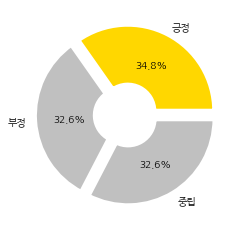

In [16]:
emotion = df['emotion'].value_counts(dropna = False)

explode = [0.05, 0.05, 0.05]
colors = ['gold','silver','silver']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(emotion, labels= ['긍정', '부정', '중립'], autopct = '%.1f%%', 
        explode = explode, colors = colors, wedgeprops = wedgeprops)
plt.show()

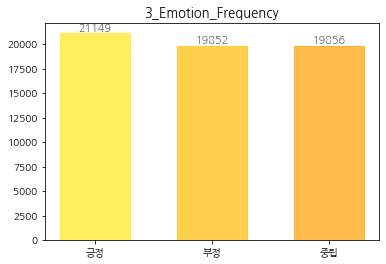

In [54]:
Emotion = ['긍정', '부정', '중립']
values = [21149, 19852 ,19856 ]
colors = sns.color_palette('Wistia', len(Emotion))

plt.bar(Emotion, values, width = 0.6, color = colors, alpha = 0.7, edgecolor = colors , linewidth = 1)

for i, v in enumerate(x):
    plt.text(v, values[i], values[i],
             fontsize = 11,
             color = 'dimgray',
             horizontalalignment = 'center',
             verticalalignment = 'bottom')
plt.xticks(x, Emotion)
plt.title('3_Emotion_Frequency', fontsize = 13)
plt.show()